Measurement result: {'1': 518, '0': 482}


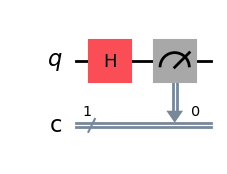

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# Create a Quantum Circuit: 1 Qubit (for processing) and 1 Classical Bit (for storing the measurement result)
qc = QuantumCircuit(1, 1)

# Apply a Hadamard Gate (H) at qubit 0
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Run in simulator
sim = AerSimulator()
job = sim.run(qc, shots=1000)  # 'shots' is the number of times we run the circuit
result = job.result()
counts = result.get_counts()

print("Measurement result:", counts)
# print(qc.draw())
qc.draw(output='mpl')


## Parameterized Quantum Circuit (PQC)

Di machine learning klasik (Neural Network), ada bobot (weights) yang dilatih. Jika jawaban salah, maka weight akan diubah sedikit.

Di Quantum Machine Learning, PQC ekuivalen dengan itu.
Alih-alih mengalikan angka, yang dilakukan adalah rotasi. Ibarat Qubit adalah bola (Block sphere).

- Gerbang biasa (H, X, Z): memutar bola dengan sudut tetap.
- Gerbang parameter (RX, RY, RZ): memutar bola dengan sudut $\theta$ (theta) yang bisa diatur sesuka hati.

Tujuan QML: mencari nilai $\theta$ terbaik agar hasil measurement sesuai keinginan.

Result (expected to be |1>): {'1': 1000}


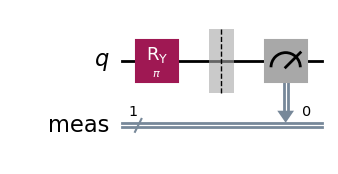

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
import numpy as np

# Create a variable (parameter)
theta = Parameter('θ')

# Create a circuit
qc = QuantumCircuit(1)

# Insert Y rotation gate (RY). It rotates the qubit in Y axis by angle theta
qc.ry(theta, 0)

# Draw the circuit
qc.draw(output='mpl')

# Bind the parameter -> 180 degree (Pi)
qc_bound = qc.assign_parameters({theta: np.pi})

# Add measurement
qc_final = qc_bound.measure_all(inplace=False)

# Run the simulator
sim = AerSimulator()
job = sim.run(qc_final, shots=1000)
result = job.result()
counts = result.get_counts()

print("Result (expected to be |1>):", counts)
qc_final.draw(output='mpl')